In [1]:
import pyspark
import pandas as pd
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('houseprice').getOrCreate()
spark

In [2]:
df = spark.read.csv('train.csv', header=True, inferSchema=True)

In [3]:
df.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |--

In [4]:
df.show()

+---+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+---------+
| Id|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1|Condition

In [5]:
df.describe().show()

+-------+-----------------+------------------+--------+-----------------+------------------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+------------------+------------------+------------------+------------------+---------+--------+-----------+-----------+----------+------------------+---------+---------+----------+--------+--------+------------+------------+-----------------+------------+-----------------+-----------------+------------------+-------+---------+----------+----------+-----------------+------------------+-----------------+-----------------+-------------------+--------------------+------------------+-------------------+------------------+-------------------+-----------+------------------+----------+------------------+-----------+----------+------------------+------------+------------------+-----------------+----------+----------+----------+------------------+-----------------+------------------+-----

In [6]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCols=df.columns[1:79],outputCols=[f'{c}_indexed' for c in df.columns[1:79]])
df_x = indexer.fit(df).transform(df)
df_x.show()

+---+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+---------+------------------+----------------+-------------------+---------------+--------------+-------------+----------------+-------------------+-----

In [7]:
df_x.na.fill(0)

DataFrame[Id: int, MSSubClass: int, MSZoning: string, LotFrontage: string, LotArea: int, Street: string, Alley: string, LotShape: string, LandContour: string, Utilities: string, LotConfig: string, LandSlope: string, Neighborhood: string, Condition1: string, Condition2: string, BldgType: string, HouseStyle: string, OverallQual: int, OverallCond: int, YearBuilt: int, YearRemodAdd: int, RoofStyle: string, RoofMatl: string, Exterior1st: string, Exterior2nd: string, MasVnrType: string, MasVnrArea: string, ExterQual: string, ExterCond: string, Foundation: string, BsmtQual: string, BsmtCond: string, BsmtExposure: string, BsmtFinType1: string, BsmtFinSF1: int, BsmtFinType2: string, BsmtFinSF2: int, BsmtUnfSF: int, TotalBsmtSF: int, Heating: string, HeatingQC: string, CentralAir: string, Electrical: string, 1stFlrSF: int, 2ndFlrSF: int, LowQualFinSF: int, GrLivArea: int, BsmtFullBath: int, BsmtHalfBath: int, FullBath: int, HalfBath: int, BedroomAbvGr: int, KitchenAbvGr: int, KitchenQual: string

In [8]:
from pyspark.ml.feature import VectorAssembler

In [9]:
feature_assembler = VectorAssembler(inputCols=df_x.columns[81:], outputCol='Independent Features')
output = feature_assembler.transform(df_x)

In [10]:
output.select('Independent Features', df_x.columns[80]).show()

+--------------------+---------+
|Independent Features|SalePrice|
+--------------------+---------+
|(78,[0,2,3,11,15,...|   208500|
|(78,[2,3,9,11,12,...|   181500|
|(78,[0,2,3,6,11,1...|   223500|
|(78,[0,2,3,6,9,11...|   140000|
|(78,[0,2,3,6,9,11...|   250000|
|(78,[0,2,3,6,11,1...|   143000|
|(78,[2,3,11,16,18...|   307000|
|(78,[0,3,6,9,11,1...|   200000|
|(78,[0,1,2,3,11,1...|   129900|
|(78,[0,2,3,9,11,1...|   118000|
|(78,[2,3,11,18,19...|   129500|
|(78,[0,2,3,6,11,1...|   345000|
|(78,[3,6,11,17,18...|   144000|
|(78,[2,3,6,11,16,...|   279500|
|(78,[3,6,9,16,18,...|   157000|
|(78,[0,1,2,3,9,11...|   132000|
|(78,[3,6,9,16,17,...|   149000|
|(78,[0,2,3,11,14,...|    90000|
|(78,[2,3,11,12,18...|   159000|
|(78,[2,3,17,18,19...|   139000|
+--------------------+---------+
only showing top 20 rows



In [11]:
final = output.select('Independent Features', df_x.columns[80])
final.show()

+--------------------+---------+
|Independent Features|SalePrice|
+--------------------+---------+
|(78,[0,2,3,11,15,...|   208500|
|(78,[2,3,9,11,12,...|   181500|
|(78,[0,2,3,6,11,1...|   223500|
|(78,[0,2,3,6,9,11...|   140000|
|(78,[0,2,3,6,9,11...|   250000|
|(78,[0,2,3,6,11,1...|   143000|
|(78,[2,3,11,16,18...|   307000|
|(78,[0,3,6,9,11,1...|   200000|
|(78,[0,1,2,3,11,1...|   129900|
|(78,[0,2,3,9,11,1...|   118000|
|(78,[2,3,11,18,19...|   129500|
|(78,[0,2,3,6,11,1...|   345000|
|(78,[3,6,11,17,18...|   144000|
|(78,[2,3,6,11,16,...|   279500|
|(78,[3,6,9,16,18,...|   157000|
|(78,[0,1,2,3,9,11...|   132000|
|(78,[3,6,9,16,17,...|   149000|
|(78,[0,2,3,11,14,...|    90000|
|(78,[2,3,11,12,18...|   159000|
|(78,[2,3,17,18,19...|   139000|
+--------------------+---------+
only showing top 20 rows



In [12]:
from pyspark.ml.regression import LinearRegression
train_data,test_data=final.randomSplit([0.75,0.25])
regressor=LinearRegression(featuresCol='Independent Features', labelCol=df_x.columns[80])
regressor=regressor.fit(train_data)

In [13]:
regressor.coefficients

DenseVector([-1081.9478, -7468.227, 128.5962, 0.5088, -42033.1743, 7338.8583, 4512.2149, -2872.8863, -47491.3081, 796.9036, -220.5468, 829.4893, -2339.5615, -2184.0608, -8105.7552, 2122.4184, 4354.0545, -2609.8511, 1.0848, -95.4434, 6471.0678, -3218.7721, 1010.5081, -1060.8237, 6859.9866, 50.2146, 19111.8647, -1608.0736, -5068.0048, 6680.3857, -13185.6476, 5245.2418, 754.0373, 12.8879, 197.8105, -86.3779, 16.5072, 22.9315, 464.8333, -3974.6901, -20108.8834, -1385.2875, 4.151, 10.5489, 459.8641, 20.4425, 7238.6087, 11165.705, -4100.9205, 14007.0436, 211.741, 23698.7498, 12651.1677, 3212.6816, -4555.1027, 16785.8175, -1796.9872, -3278.3424, 82.6865, 312.1433, 3868.6169, 95.9619, -5016.3843, -847.1638, -10160.2094, 103.4118, 109.71, -9.9273, 1920.3107, 170.1735, 10939.364, -26239.4743, -1460.8891, 3151.0138, -1470.2882, -792.7395, 689.2229, 2753.8058])

In [14]:
regressor.intercept

93706.38875155649

In [15]:
pred_results=regressor.evaluate(test_data)

In [21]:
import pyspark.sql.functions as func
pred_df = pred_results.predictions
pred_df = pred_df.withColumn('prediction',func.round(pred_df['prediction']))
pred_df.show()

+--------------------+---------+----------+
|Independent Features|SalePrice|prediction|
+--------------------+---------+----------+
|(78,[0,1,2,3,5,6,...|    73000|  122130.0|
|(78,[0,1,2,3,5,6,...|   164700|  174881.0|
|(78,[0,1,2,3,5,7,...|   159500|  150506.0|
|(78,[0,1,2,3,5,9,...|   164500|  196623.0|
|(78,[0,1,2,3,5,11...|   151000|  181072.0|
|(78,[0,1,2,3,5,11...|   114504|   65422.0|
|(78,[0,1,2,3,5,11...|   103000|  131474.0|
|(78,[0,1,2,3,5,11...|   110000|  113572.0|
|(78,[0,1,2,3,5,11...|   153500|  141280.0|
|(78,[0,1,2,3,6,7,...|   144000|  174834.0|
|(78,[0,1,2,3,6,7,...|   140000|  109799.0|
|(78,[0,1,2,3,6,7,...|   145000|  133223.0|
|(78,[0,1,2,3,6,11...|   475000|  282706.0|
|(78,[0,1,2,3,7,10...|   108000|  124585.0|
|(78,[0,1,2,3,7,11...|   141000|  135282.0|
|(78,[0,1,2,3,9,11...|   115000|   97562.0|
|(78,[0,1,2,3,9,11...|   100000|  150668.0|
|(78,[0,1,2,3,9,11...|   155000|  156354.0|
|(78,[0,1,2,3,9,11...|    76000|   28100.0|
|(78,[0,1,2,3,9,11...|   120000|

In [17]:
pred_results.r2,pred_results.meanAbsoluteError,pred_results.meanSquaredError

(0.6948518802673356, 32016.57879924523, 2270221780.2248116)

In [22]:
final_df = pred_df.drop('Independent Features')

In [25]:
final_df.show()

+---------+----------+
|SalePrice|prediction|
+---------+----------+
|    73000|  122130.0|
|   164700|  174881.0|
|   159500|  150506.0|
|   164500|  196623.0|
|   151000|  181072.0|
|   114504|   65422.0|
|   103000|  131474.0|
|   110000|  113572.0|
|   153500|  141280.0|
|   144000|  174834.0|
|   140000|  109799.0|
|   145000|  133223.0|
|   475000|  282706.0|
|   108000|  124585.0|
|   141000|  135282.0|
|   115000|   97562.0|
|   100000|  150668.0|
|   155000|  156354.0|
|    76000|   28100.0|
|   120000|  166712.0|
+---------+----------+
only showing top 20 rows



In [31]:
sale_price = final_df[['SalePrice']].collect()
predicted_price = final_df[['prediction']].collect()

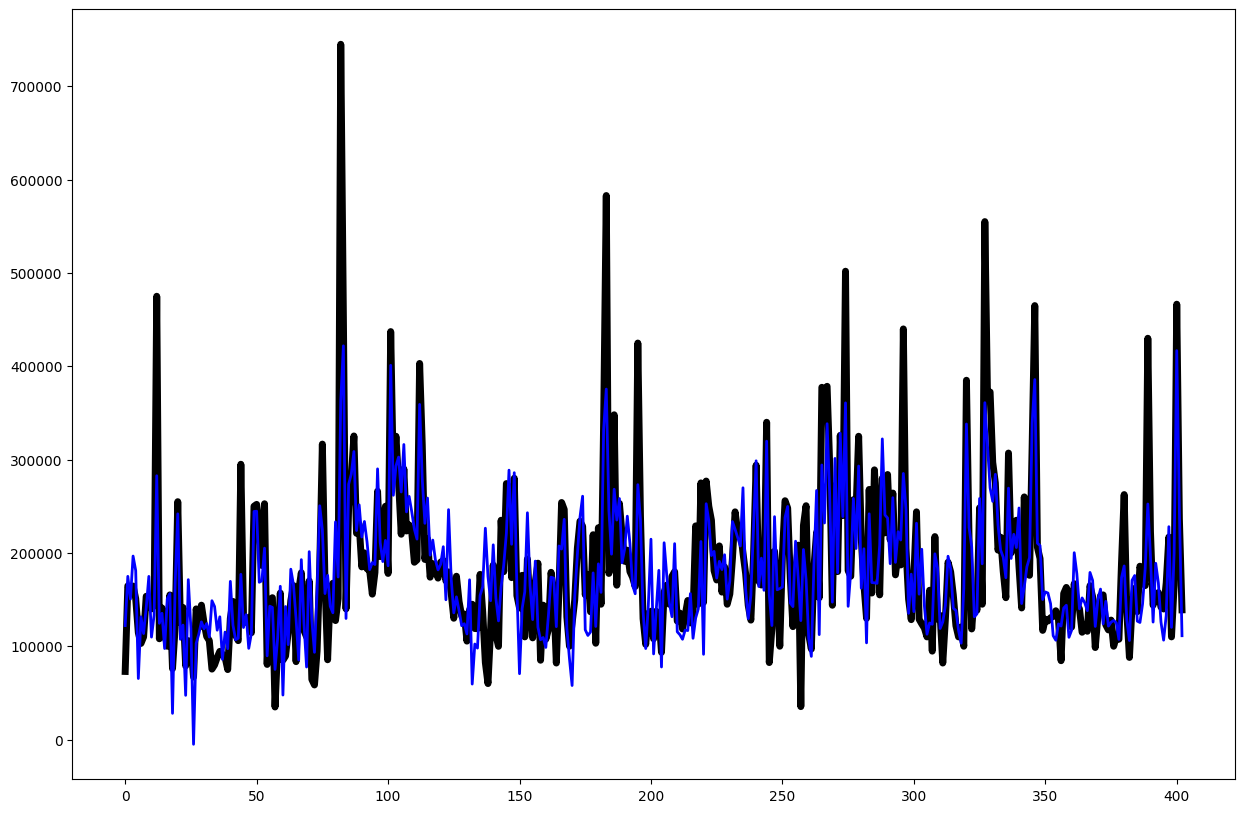

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(sale_price, color='black',linewidth='5')
plt.plot(predicted_price, color='blue',linewidth='2')
plt.show()

In [34]:
final_df.describe().show()

+-------+------------------+-----------------+
|summary|         SalePrice|       prediction|
+-------+------------------+-----------------+
|  count|               403|              403|
|   mean|181854.66997518612|179132.9106699752|
| stddev| 86361.12484927237|66635.51403944034|
|    min|             34900|          -5050.0|
|    max|            745000|         421881.0|
+-------+------------------+-----------------+



DataFrame[summary: string, SalePrice: string, prediction: string]